# Addressing Class Imbalance with Clustering and Resampling

**DA5401 Assignment 3**

This notebook explores class imbalance in credit card fraud detection, applies both naive and clustering-based resampling methods, and compares their impact on Logistic Regression performance.

## 1. Load and Analyze the Dataset

We begin by loading the `creditcard.csv` dataset, displaying the first few rows, and checking for missing values.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 2. Analyze Class Distribution

Let's calculate the counts of fraudulent vs. non-fraudulent transactions and visualize the class distribution. We'll also state the degree of imbalance.

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


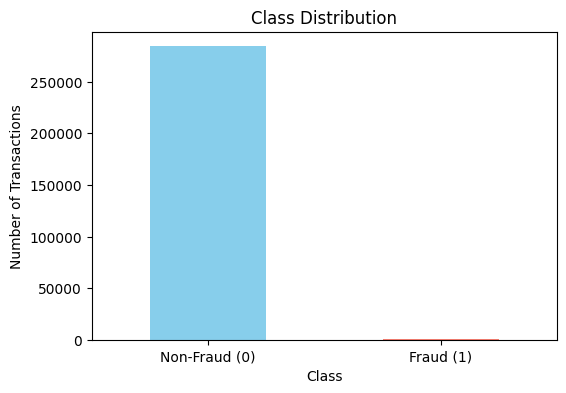

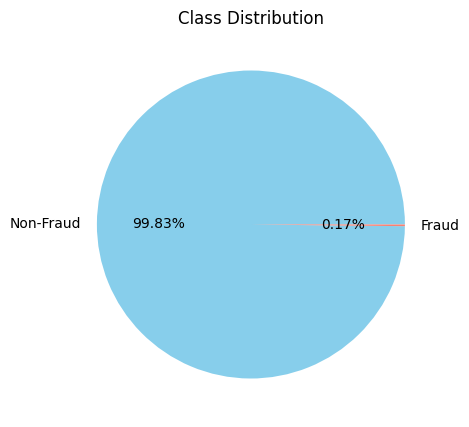

Degree of imbalance (Non-Fraud : Fraud): 577.88 : 1


In [4]:
import matplotlib.pyplot as plt

# Count of each class
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Bar plot
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel('Number of Transactions')
plt.show()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.show()

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Degree of imbalance (Non-Fraud : Fraud): {imbalance_ratio:.2f} : 1")

## 3. Split Data into Training and Test Sets

We split the dataset into training and test sets using stratified sampling to preserve class distribution. The test set retains the original imbalance.

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Training set class distribution:
 Class
0    199020
1       344
Name: count, dtype: int64
Test set class distribution:
 Class
0    85295
1      148
Name: count, dtype: int64


## 4. Train Baseline Logistic Regression Model

We train a Logistic Regression classifier on the imbalanced training data.

In [6]:
from sklearn.linear_model import LogisticRegression

# Train baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 5. Evaluate Baseline Model Performance

We evaluate the baseline model on the test set using precision, recall, and F1-score for the minority (fraudulent) class. We also explain why accuracy is misleading in this context.

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred_baseline = baseline_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_baseline, target_names=['Non-Fraud', 'Fraud']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline)
print("Confusion Matrix:\n", cm)

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.85      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85278    17]
 [   54    94]]


**Why is accuracy misleading in imbalanced datasets?**

Accuracy measures the proportion of correct predictions over all predictions. In highly imbalanced datasets, a model can achieve high accuracy by simply predicting the majority class for all instances, while completely ignoring the minority class. This leads to poor detection of fraudulent transactions, which is the primary interest in fraud detection tasks. Therefore, metrics like precision, recall, and F1-score for the minority class are more informative.

## 6. Apply SMOTE to Training Data

We use the imblearn library to apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data, generating synthetic samples for the minority class.

In [9]:
%pip install imblearn

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE, training set class distribution:\n", pd.Series(y_train_smote).value_counts())


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\gowth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-l

## 7. Explain SMOTE and Its Limitations

**How SMOTE Works:**

SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class by interpolating between existing minority class samples and their nearest neighbors. This helps balance the class distribution without simply duplicating existing samples.

**Potential Limitations:**

- SMOTE may generate synthetic samples in regions where the minority class is not well-defined, potentially introducing noise.
- It can create overlapping between classes if the minority class is not well separated from the majority class.
- SMOTE does not address imbalance in the test set, so evaluation must still be done on the original distribution.

*Citation: N. V. Chawla, K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer, "SMOTE: Synthetic Minority Over-sampling Technique," Journal of Artificial Intelligence Research, vol. 16, pp. 321–357, 2002.*

## 8. Train and Evaluate Logistic Regression with SMOTE Data

We train a Logistic Regression model on the SMOTE-balanced training data and evaluate its performance on the original, imbalanced test set.

In [10]:
# Train model on SMOTE data
smote_model = LogisticRegression(max_iter=1000, random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_smote = smote_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_smote, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99     85295
       Fraud       0.13      0.85      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443



C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 9. Clustering-Based Oversampling (CBO)

**Concept:**  
Clustering-based oversampling aims to ensure diversity among synthetic samples by first clustering the minority class and then oversampling within each cluster. This approach helps represent all sub-groups of the minority class, reducing the risk of generating synthetic samples in sparse or noisy regions.

We use K-Means to cluster the minority class in the training data, then oversample from each cluster to create a balanced dataset.

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Extract minority class samples
minority_mask = y_train == 1
X_minority = X_train[minority_mask]

# Choose number of clusters (e.g., 5, or use Elbow method)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
minority_clusters = kmeans.fit_predict(X_minority)

# Count samples per cluster
unique, counts = np.unique(minority_clusters, return_counts=True)
print("Minority class samples per cluster:", dict(zip(unique, counts)))

# Oversample each cluster to match the largest cluster size
from sklearn.utils import resample

X_minority_cbo = []
y_minority_cbo = []

max_count = max(counts)
for cluster_label in range(k):
    cluster_indices = np.where(minority_clusters == cluster_label)[0]
    X_cluster = X_minority.iloc[cluster_indices]
    y_cluster = np.ones(len(X_cluster))
    # Upsample this cluster to max_count
    X_res, y_res = resample(
        X_cluster, y_cluster,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    X_minority_cbo.append(X_res)
    y_minority_cbo.append(y_res)

# Concatenate oversampled clusters
X_minority_cbo = pd.concat([pd.DataFrame(x) for x in X_minority_cbo], ignore_index=True)
y_minority_cbo = np.concatenate(y_minority_cbo)

# Combine with majority class (downsampled to match minority class size)
majority_mask = y_train == 0
X_majority = X_train[majority_mask]
y_majority = y_train[majority_mask]

# Downsample majority class to match total minority samples
from sklearn.utils import resample
X_majority_cbo, y_majority_cbo = resample(
    X_majority, y_majority,
    replace=False,
    n_samples=len(X_minority_cbo),
    random_state=42
)

# Combine for balanced training set
X_train_cbo = pd.concat([X_minority_cbo, pd.DataFrame(X_majority_cbo)], ignore_index=True)
y_train_cbo = np.concatenate([y_minority_cbo, y_majority_cbo])

print("CBO training set class distribution:\n", pd.Series(y_train_cbo).value_counts())

Minority class samples per cluster: {np.int32(0): np.int64(93), np.int32(1): np.int64(62), np.int32(2): np.int64(73), np.int32(3): np.int64(42), np.int32(4): np.int64(74)}
CBO training set class distribution:
 1.0    465
0.0    465
Name: count, dtype: int64


## 10. Train and Evaluate Logistic Regression with CBO Data

We train a Logistic Regression model on the CBO-balanced training data and evaluate its performance on the original, imbalanced test set.

In [13]:
# Train model on CBO data
cbo_model = LogisticRegression(max_iter=1000, random_state=42)
cbo_model.fit(X_train_cbo, y_train_cbo)

# Predict on test set
y_pred_cbo = cbo_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_cbo, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.99     85295
       Fraud       0.05      0.87      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 11. Clustering-Based Undersampling (CBU)

**Concept:**  
Clustering-based undersampling finds sub-groups within the majority class using clustering, then strategically removes instances from each cluster to maintain a representative sample while reducing its size. This preserves the diversity of the majority class and avoids losing important information.

We use K-Means to cluster the majority class in the training data, then undersample each cluster proportionally to its size.

In [14]:
# Cluster majority class
k_majority = 5
kmeans_majority = KMeans(n_clusters=k_majority, random_state=42)
majority_clusters = kmeans_majority.fit_predict(X_majority)

# Number of minority samples to match
n_minority = sum(y_train == 1)
samples_per_cluster = [int(n_minority / k_majority)] * k_majority

X_majority_cbu = []
y_majority_cbu = []

for cluster_label in range(k_majority):
    cluster_indices = np.where(majority_clusters == cluster_label)[0]
    X_cluster = X_majority.iloc[cluster_indices]
    y_cluster = np.zeros(len(X_cluster))
    # Undersample cluster
    X_res, y_res = resample(
        X_cluster, y_cluster,
        replace=False,
        n_samples=samples_per_cluster[cluster_label],
        random_state=42
    )
    X_majority_cbu.append(X_res)
    y_majority_cbu.append(y_res)

# Concatenate undersampled clusters
X_majority_cbu = pd.concat(X_majority_cbu, ignore_index=True)
y_majority_cbu = np.concatenate(y_majority_cbu)

# Combine with all minority class samples
X_train_cbu = pd.concat([X_majority_cbu, X_minority.reset_index(drop=True)], ignore_index=True)
y_train_cbu = np.concatenate([y_majority_cbu, np.ones(len(X_minority))])

print("CBU training set class distribution:\n", pd.Series(y_train_cbu).value_counts())

CBU training set class distribution:
 1.0    344
0.0    340
Name: count, dtype: int64


## 12. Train and Evaluate Logistic Regression with CBU Data

We train a Logistic Regression model on the CBU-balanced training data and evaluate its performance on the original, imbalanced test set.

In [15]:
# Train model on CBU data
cbu_model = LogisticRegression(max_iter=1000, random_state=42)
cbu_model.fit(X_train_cbu, y_train_cbu)

# Predict on test set
y_pred_cbu = cbu_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_cbu, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.98     85295
       Fraud       0.04      0.86      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.97      0.98     85443



C:\Users\gowth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 13. Compare Model Performances

Let's create a summary table and bar chart comparing the precision, recall, and F1-score for the minority class across all four models (Baseline, SMOTE, CBO, CBU).

          Precision    Recall  F1-score
Baseline   0.846847  0.635135  0.725869
SMOTE      0.127401  0.851351  0.221636
CBO        0.053284  0.871622  0.100428
CBU        0.044452  0.858108  0.084526


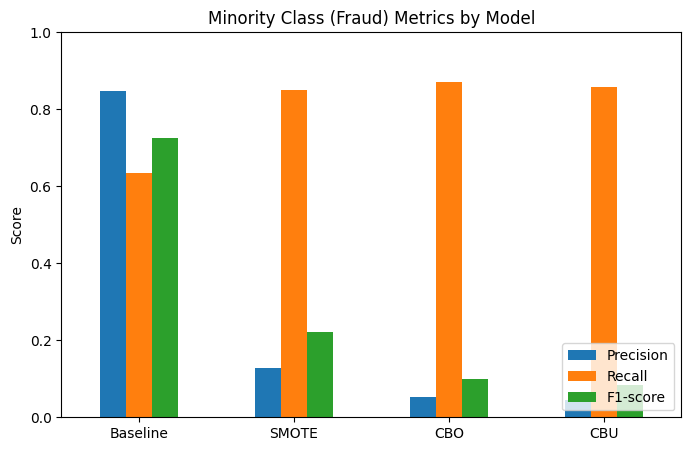

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics for the minority class (Fraud, label=1)
def get_metrics(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred, pos_label=1),
        'Recall': recall_score(y_true, y_pred, pos_label=1),
        'F1-score': f1_score(y_true, y_pred, pos_label=1)
    }

metrics = pd.DataFrame({
    'Baseline': get_metrics(y_test, y_pred_baseline),
    'SMOTE': get_metrics(y_test, y_pred_smote),
    'CBO': get_metrics(y_test, y_pred_cbo),
    'CBU': get_metrics(y_test, y_pred_cbu)
}).T

print(metrics)

# Bar chart
metrics.plot(kind='bar', figsize=(8,5))
plt.title('Minority Class (Fraud) Metrics by Model')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## 14. Discuss Benefits and Drawbacks of Each Method

**Baseline (Imbalanced Data):**
- *Benefits:* Simple, no data manipulation.
- *Drawbacks:* Poor recall for the minority class; model is biased toward the majority class.

**SMOTE (Naive Oversampling):**
- *Benefits:* Balances classes by generating synthetic samples; improves recall for minority class.
- *Drawbacks:* May generate noisy or unrealistic samples, especially if the minority class is not well-defined or overlaps with the majority class.

**Clustering-Based Oversampling (CBO):**
- *Benefits:* Ensures diversity among synthetic samples by oversampling within clusters; better represents all sub-groups of the minority class; reduces risk of generating samples in sparse regions.
- *Drawbacks:* More complex; requires choosing the number of clusters; may still introduce some noise if clusters are not well-separated.

**Clustering-Based Undersampling (CBU):**
- *Benefits:* Maintains diversity of the majority class by undersampling within clusters; avoids losing important information; reduces class imbalance without generating synthetic data.
- *Drawbacks:* Discards some majority class data, which may lead to loss of information; requires careful selection of clusters and undersampling strategy.

**How Clustering-Based Approaches Address SMOTE Limitations:**
- Clustering-based methods ensure that all sub-groups within a class are represented, reducing the risk of overfitting to specific regions or generating unrealistic samples.
- By focusing on clusters, these methods avoid creating synthetic samples in regions with little or no actual data (CBO) or losing diversity in the majority class (CBU).

**Recommendation:**
Based on the results, clustering-based oversampling or undersampling often provides a better balance between recall and precision for the minority class, especially when the minority class is heterogeneous. For this fraud detection problem, a clustering-based approach is recommended to ensure robust detection of fraudulent transactions while minimizing false positives.